# **Clasificaci√≥n utilizando LightGBM (LGBM)**

El dataset de predicci√≥n de pr√©stamos contiene informaci√≥n sobre solicitantes de pr√©stamos, como sus ingresos, historial crediticio y otras caracter√≠sticas personales. El objetivo es predecir si un solicitante ser√° aprobado para un pr√©stamo bas√°ndose en estos factores.

LightGBM, libreria para regresion y clasificacion. Muy Flexible y permite el ajuste de varios parametros para otimizar el rendimiento del modelo.

# **Parte 1: Carga y Exploraci√≥n Inicial de Datos**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/BBDD/train.csv"
import pandas as pd
df = pd.read_csv(path)

Mounted at /content/drive


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
df.describe().T

count         mean          std    min     25%     50%  \
ApplicantIncome    614.0  5403.459283  6109.041673  150.0  2877.5  3812.5   
CoapplicantIncome  614.0  1621.245798  2926.248369    0.0     0.0  1188.5   
LoanAmount         592.0   146.412162    85.587325    9.0   100.0   128.0   
Loan_Amount_Term   600.0   342.000000    65.120410   12.0   360.0   360.0   
Credit_History     564.0     0.842199     0.364878    0.0     1.0     1.0   

                       75%      max  
ApplicantIncome    5795.00  81000.0  
CoapplicantIncome  2297.25  41667.0  
LoanAmount          168.00    700.0  
Loan_Amount_Term    360.00    480.0  
Credit_History        1.00      1.0

identificacion de valores faltantes.

In [5]:
# Porcentaje de valores faltantes
missing_percent = df.isnull().mean() * 100
missing = missing_percent[missing_percent > 0]
print("Valores faltantes por columna:\n", missing.sort_values(ascending=False))

Valores faltantes por columna:
 Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64


estadisticas descriptivas

         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP002990   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        614.000000         614.000000  592.000000         600.00000   
unique 

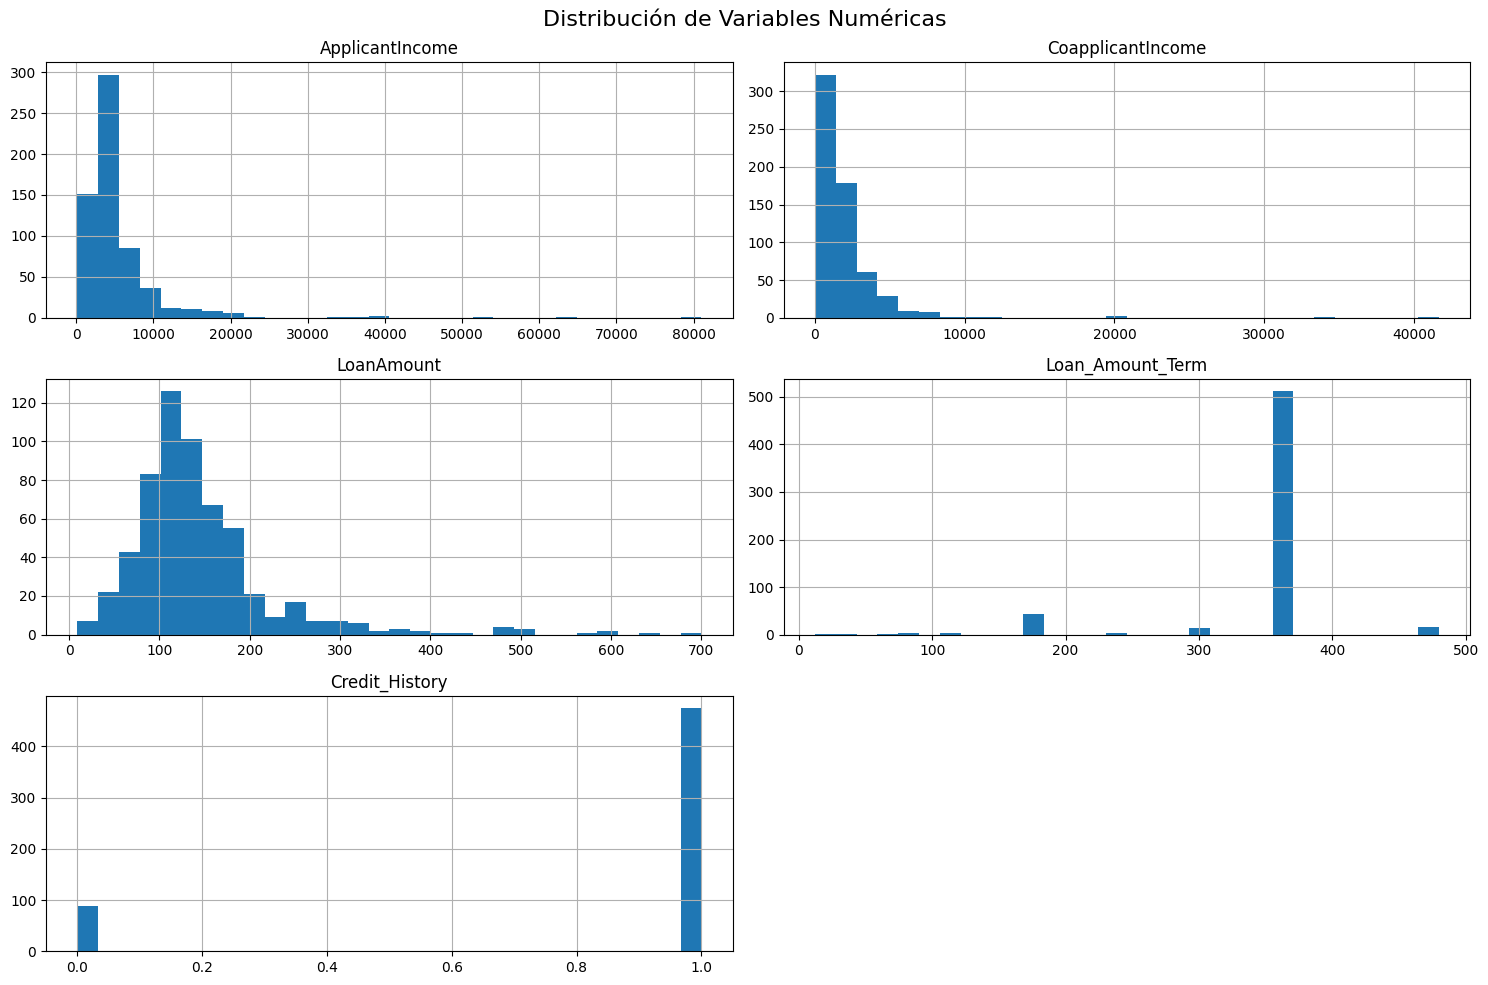

In [6]:
# Estad√≠sticas descriptivas
print(df.describe(include='all'))  # Incluye tanto num√©ricas como categ√≥ricas

# Distribuci√≥n de variables num√©ricas
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribuci√≥n de Variables Num√©ricas", fontsize=16)
plt.tight_layout()
plt.show()

Outliers con boxplot

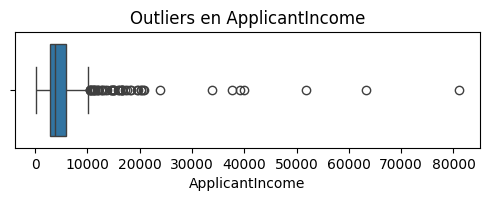

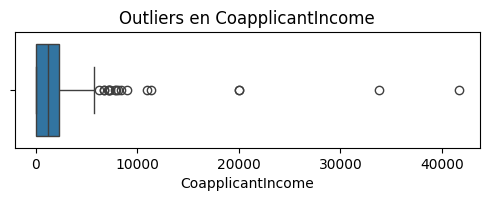

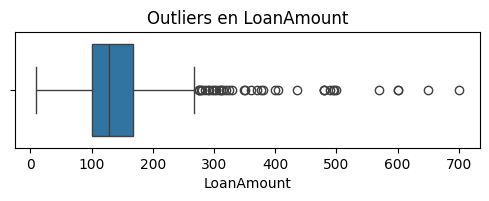

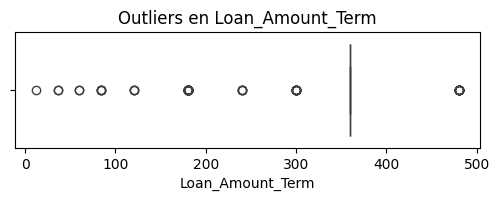

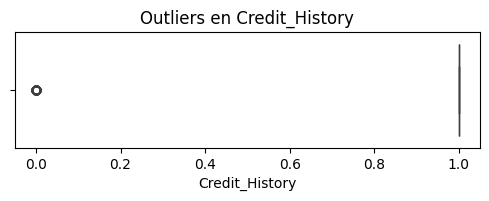

In [7]:
# Boxplots para detectar outliers en variables num√©ricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers en {col}")
    plt.show()

Mapa de calor de correlaciones entre variables num√©ricas

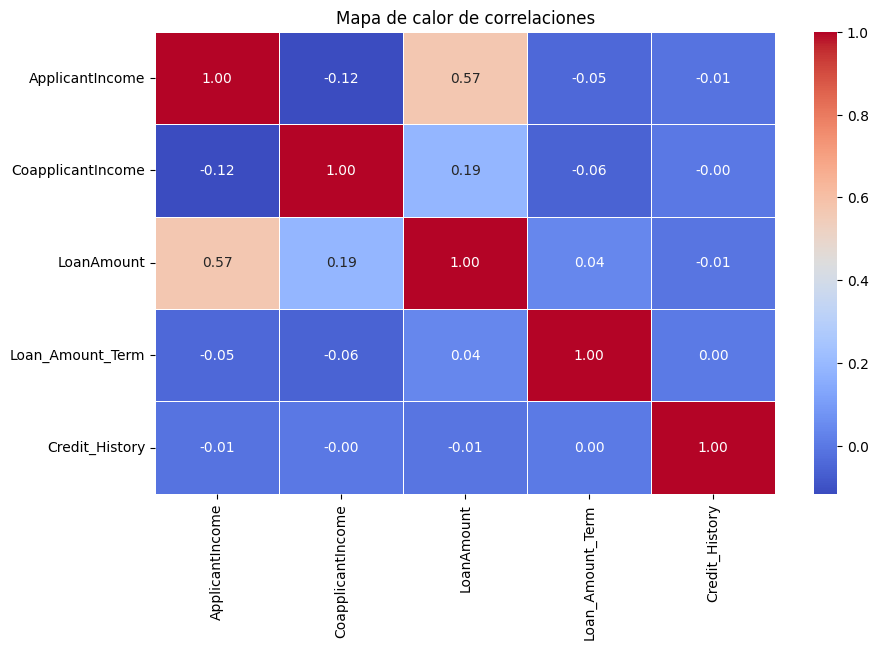

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas num√©ricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculamos la matriz de correlaci√≥n
correlation_matrix = df_numeric.corr()

# Graficamos el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de correlaciones')
plt.show()

* Hay una correlaci√≥n moderada (0.57) entre ApplicantIncome y LoanAmount, lo que sugiere que a mayor ingreso del solicitante, mayor puede ser el monto del pr√©stamo.

* El resto de las correlaciones son bajas o casi nulas, indicando relaciones d√©biles entre esas variables.

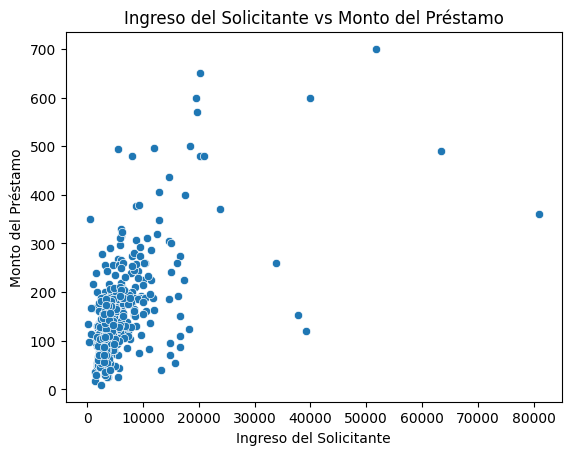

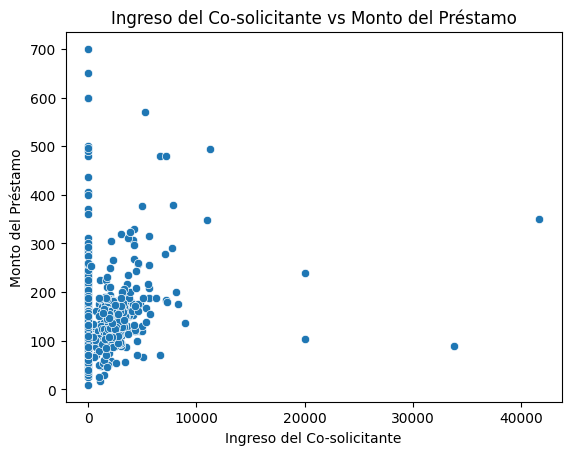

In [9]:
# Gr√°fico de dispersi√≥n: Ingreso vs Monto del Pr√©stamo
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount')
plt.title('Ingreso del Solicitante vs Monto del Pr√©stamo')
plt.xlabel('Ingreso del Solicitante')
plt.ylabel('Monto del Pr√©stamo')
plt.show()

# Otro ejemplo: CoapplicantIncome vs LoanAmount
sns.scatterplot(data=df, x='CoapplicantIncome', y='LoanAmount')
plt.title('Ingreso del Co-solicitante vs Monto del Pr√©stamo')
plt.xlabel('Ingreso del Co-solicitante')
plt.ylabel('Monto del Pr√©stamo')
plt.show()

**Ingreso del Solicitante vs Monto del Pr√©stamo**

1.   Se observa una relaci√≥n positiva moderada: a mayor ingreso, tiende a solicitarse un monto mayor de pr√©stamo.
2.   Sin embargo, hay outliers con ingresos muy altos y pr√©stamos relativamente bajos, lo cual puede distorsionar el an√°lisis.

**Ingreso del Co-solicitante vs Monto del Pr√©stamo**
3. La relaci√≥n es m√°s d√©bil que en el primer gr√°fico.
4. Se concentra gran parte de los datos cuando el ingreso del co-solicitante es cero (es decir, no hay co-solicitante).

# **Parte 2: Deteccion de outliers y manejo de valore faltantes.**

---




In [10]:
# Porcentaje de valores faltantes por columna
missing_percent = df.isnull().mean() * 100
missing = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("Valores faltantes (%):")
print(missing)

Valores faltantes (%):
Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64


In [12]:
# Crear una copia para no modificar el original
df_cleaned = df.copy()

# =============================
# 1. IMPUTACI√ìN DE VALORES FALTANTES
# =============================

# CATEG√ìRICAS: rellenar con la moda (valor m√°s frecuente)
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_columns:
    moda = df_cleaned[col].mode()[0]
    df_cleaned[col] = df_cleaned[col].fillna(moda)

# NUM√âRICAS: rellenar con la mediana (menos sensible a outliers)
numerical_columns = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_columns:
    mediana = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(mediana)


# =============================
# 2. MANEJO DE OUTLIERS CON M√âTODO IQR
# =============================

# Funci√≥n que elimina outliers seg√∫n IQR
def filter_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Aplicar la funci√≥n a columnas num√©ricas propensas a outliers
outlier_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in outlier_columns:
    df_cleaned = filter_outliers_iqr(df_cleaned, col)

# =============================
# 3. RESULTADO
# =============================

# Verifica si el dataframe final est√° limpio
print(df_cleaned.info())
print(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            520 non-null    object 
 1   Gender             520 non-null    object 
 2   Married            520 non-null    object 
 3   Dependents         520 non-null    object 
 4   Education          520 non-null    object 
 5   Self_Employed      520 non-null    object 
 6   ApplicantIncome    520 non-null    int64  
 7   CoapplicantIncome  520 non-null    float64
 8   LoanAmount         520 non-null    float64
 9   Loan_Amount_Term   520 non-null    float64
 10  Credit_History     520 non-null    float64
 11  Property_Area      520 non-null    object 
 12  Loan_Status        520 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 56.9+ KB
None
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      

# **Parte 3: Pre-Procesamiento de los datos**

---



In [21]:
# One-Hot Encoding (excluyendo la variable objetivo 'Loan_Status')
df_encoded = pd.get_dummies(df_cleaned, columns=[
    'Gender', 'Married', 'Dependents', 'Education',
    'Self_Employed', 'Property_Area'
], drop_first=True)

In [22]:
from sklearn.preprocessing import StandardScaler

# Instanciar el escalador
scaler = StandardScaler()

# Seleccionar columnas num√©ricas a escalar
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Escalar y reemplazar en el DataFrame
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

**Division del conjunto de datos.**

In [23]:
from sklearn.model_selection import train_test_split

# Variable objetivo: codificar Y como 1 (aprobado) y 0 (no aprobado)
df_encoded['Loan_Status'] = df_encoded['Loan_Status'].map({'Y': 1, 'N': 0})

# Separar variables predictoras y objetivo
X = df_encoded.drop(columns='Loan_Status')
y = df_encoded['Loan_Status']

# Divisi√≥n en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **Parte 4: Implementaci√≥n de LightGBM (LGBM)**

---


In [24]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
X_train = X_train.drop(columns='Loan_ID', errors='ignore')
X_test = X_test.drop(columns='Loan_ID', errors='ignore')
# Entrenar modelo base
lgbm_base = lgb.LGBMClassifier(random_state=42)
lgbm_base.fit(X_train, y_train)

# Predicciones
y_pred = lgbm_base.predict(X_test)
y_proba = lgbm_base.predict_proba(X_test)[:, 1]

# Evaluaci√≥n de m√©tricas
print("üîπ Evaluaci√≥n Modelo Base")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 290, number of negative: 126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 416, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.697115 -> initscore=0.833599
[LightGBM] [Info] Start training from score 0.833599
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

optimizacion de hiperparametros

In [25]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Definimos una nueva instancia del modelo para no sobreescribir el modelo base
lgbm_grid = lgb.LGBMClassifier(random_state=42)

# Grilla de hiperpar√°metros para buscar
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63]
}

# Configurar b√∫squeda con validaci√≥n cruzada
grid_search = GridSearchCV(
    estimator=lgbm_grid,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Entrenar b√∫squeda
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
best_lgbm = grid_search.best_estimator_

# Predicciones del modelo optimizado
y_pred_opt = best_lgbm.predict(X_test)
y_proba_opt = best_lgbm.predict_proba(X_test)[:, 1]

# Evaluaci√≥n del modelo optimizado
print("üîπ Evaluaci√≥n Modelo Optimizado")
print("Mejores hiperpar√°metros:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_opt))
print("Precision:", precision_score(y_test, y_pred_opt))
print("Recall:", recall_score(y_test, y_pred_opt))
print("F1 Score:", f1_score(y_test, y_pred_opt))
print("ROC AUC:", roc_auc_score(y_test, y_proba_opt))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 290, number of negative: 126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 416, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.697115 -> initscore=0.833599
[LightGBM] [Info] Start training from score 0.833599
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

**Comparaci√≥n de modelo base y optimizado.**

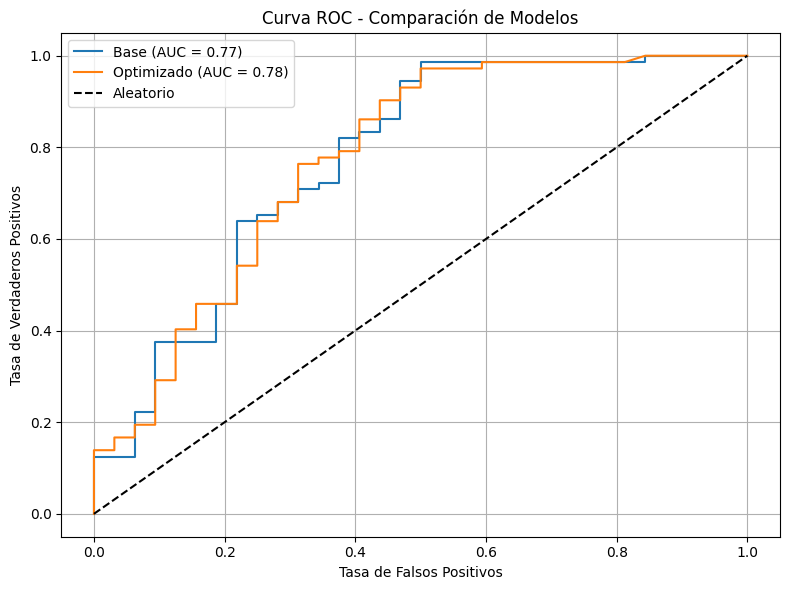

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Si no las tienes, crea nuevamente:
y_pred_base = lgbm_base.predict(X_test)
y_proba_base = lgbm_base.predict_proba(X_test)[:, 1]

y_pred_opt = best_lgbm.predict(X_test)
y_proba_opt = best_lgbm.predict_proba(X_test)[:, 1]

# 1. Guardar m√©tricas en diccionarios
metrics_base = {
    "Accuracy": accuracy_score(y_test, y_pred_base),
    "Precision": precision_score(y_test, y_pred_base),
    "Recall": recall_score(y_test, y_pred_base),
    "F1 Score": f1_score(y_test, y_pred_base),
    "ROC AUC": roc_auc_score(y_test, y_proba_base)
}

metrics_opt = {
    "Accuracy": accuracy_score(y_test, y_pred_opt),
    "Precision": precision_score(y_test, y_pred_opt),
    "Recall": recall_score(y_test, y_pred_opt),
    "F1 Score": f1_score(y_test, y_pred_opt),
    "ROC AUC": roc_auc_score(y_test, y_proba_opt)
}

# 3. Curva ROC
fpr_base, tpr_base, _ = roc_curve(y_test, y_proba_base)
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_proba_opt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label=f'Base (AUC = {metrics_base["ROC AUC"]:.2f})')
plt.plot(fpr_opt, tpr_opt, label=f'Optimizado (AUC = {metrics_opt["ROC AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Comparaci√≥n de Modelos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()